In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import siestah2o as h2o
import numpy as np 
import xcml
import siesta_utils.grid as siesta

In [65]:
import ipyparallel as parallel
import time
client = parallel.Client(profile='default')

/home/sebastian/miniconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:458: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@supercool')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [70]:
loader = h2o.DescriptorGetter(client)

Clients operating : 8


In [71]:
coords = np.genfromtxt('./128.csv', delimiter = ',').reshape(-1,3,3)

In [73]:
start = time.time()
feat = loader.get_features(coords)
print(time.time()- start)

7.763962030410767


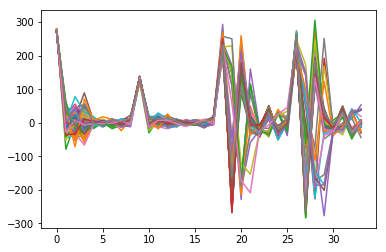

In [63]:
plot(feat[0].reshape(-1,34).T);

In [64]:
np.allclose(feat[0], descr)

True

In [29]:
siesta.get_data('./h2o.RHOXC');

In [14]:
coords = coords.reshape(-1,3)

In [18]:
xcml.box_fast(coords[0],1.0,siesta)[0].shape

(25, 25, 25)

In [15]:
start = time.time()
rho_snippets = []
for c in coords:
    rho_snippets.append(siesta.rho[xcml.box_fast(c, 1.5, siesta)])
print(time.time() - start)

0.8963418006896973


In [32]:
basis = {'r_c_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_c_h' : 1.5,
                      'n_rad_o' : 2,'n_rad_h' : 2, 'n_l_o' : 3,
                      'n_l_h' : 2, 'gamma_o': 20, 'gamma_h': 15}

descr = xcml.full_decomposition(coords, siesta, basis)
# start = time.time()
# rho_snippets = []
# for c in coords:
#     for a, l in zip(c,['o', 'h', 'h']):
#         rho_snippets.append(siesta.rho[xcml.box_fast(a,
#          basis['r_c_' + l], siesta)])
# print(time.time() - start)

(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180

(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (25, 25, 25)
(180, 180, 180) (37, 37, 37)
(180, 180, 180) (37, 37, 37)
(180, 180, 180

In [ ]:
descr = xcml.full_decomposition

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


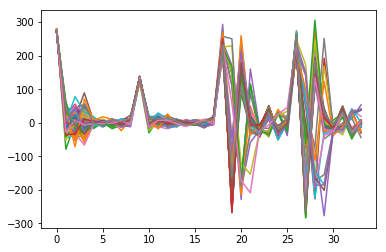

In [43]:
plot(descr.reshape(-1,34).T);

In [44]:
import pandas as pd

In [46]:
pd.DataFrame(descr).to_csv('ref_descr.dat', index = None , header = None)

In [59]:
coords = coords.reshape(-1,3)